<a href="https://colab.research.google.com/github/YasinnSoylu/Deep_Belief_Networks_CNN/blob/main/Deep_Belief_Networks_(DBN)_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))


In [ ]:
class RBM:
  def __init__(self, n_visible, n_hidden):
    self.W = tf.Variable(tf.random.normal(shape=(n_visible, n_hidden)))
    self.vb = tf.Variable(tf.zeros(shape=(n_visible,)))
    self.hb = tf.Variable(tf.zeros(shape=(n_hidden,)))

  def sigmoid(self, x):
    return 1.0 / (1.0 + tf.exp(-x))

  def gibbs_step_vhv(self, v0):
    h0 = self.sigmoid(tf.matmul(v0, self.W) + self.hb)
    v1 = self.sigmoid(tf.matmul(h0, tf.transpose(self.W)) + self.vb)
    h1 = self.sigmoid(tf.matmul(v1, self.W) + self.hb)
    return h0

class RBM_Layer(tf.keras.layers.Layer):
  def __init__(self, n_visible, n_hidden, name='rbm_layer', **kwargs):
    super(RBM_Layer, self).__init__(name=name, **kwargs)
    self.rbm = RBM(n_visible, n_hidden)

  def call(self, inputs):
    hidden = self.rbm.gibbs_step_vhv(inputs)
    return hidden

model = tf.keras.models.Sequential([
  RBM_Layer(784, 512, name='rbm_layer1'),
  RBM_Layer(512, 256, name='rbm_layer2'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['SparseCategoricalAccuracy'])

history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))



Epoch 1/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9127 - sparse_categorical_accuracy: 0.7420 - val_loss: 0.6002 - val_sparse_categorical_accuracy: 0.8236
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5724 - sparse_categorical_accuracy: 0.8269 - val_loss: 0.5218 - val_sparse_categorical_accuracy: 0.8416
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5235 - sparse_categorical_accuracy: 0.8374 - val_loss: 0.4911 - val_sparse_categorical_accuracy: 0.8514
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5021 - sparse_categorical_accuracy: 0.8436 - val_loss: 0.4807 - val_sparse_categorical_accuracy: 0.8524
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4893 - sparse_categorical_accuracy: 0.8465 - val_loss: 0.4726 - val_sparse_categorical_accuracy: 0.8559
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4821 - spar

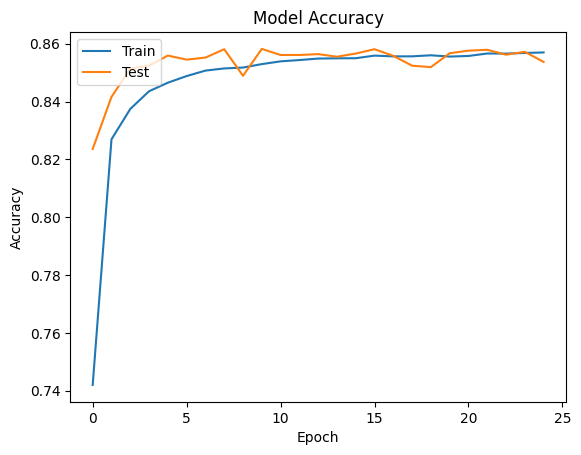

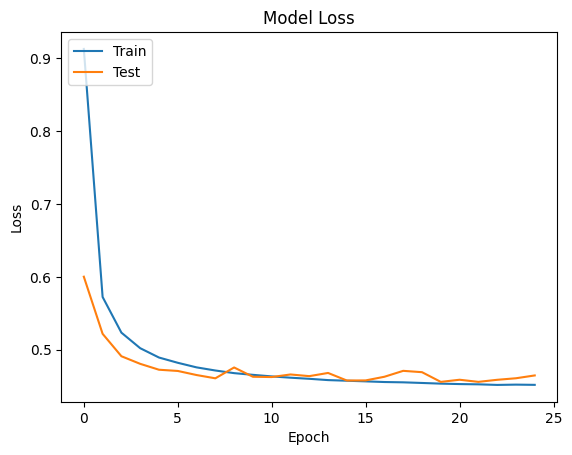

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 122ms/step


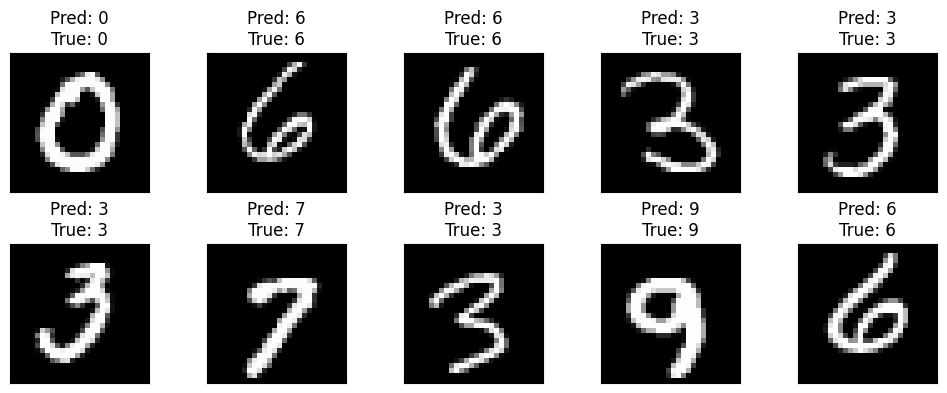

In [ ]:
# Rastgele 10 örnek seçelim
random_indices = np.random.choice(len(x_test), size=10, replace=False)
x_test_random = x_test[random_indices]
y_test_random = y_test[random_indices]

# Tahminleri yapalım
predictions = model.predict(x_test_random)

# Tahminlerin ve gerçek etiketlerin görselleştirilmesi
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test_random[i].reshape(28, 28), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Pred: {}\nTrue: {}'.format(np.argmax(predictions[i]), y_test_random[i]))
    
plt.tight_layout()
plt.show()

313/313 [==============================] - 2s 5ms/step


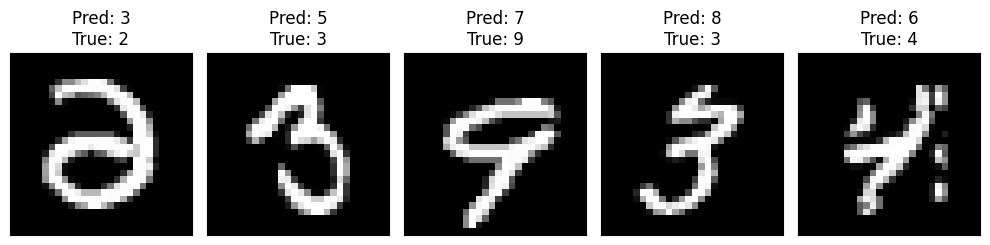

In [ ]:
# Tahminleri yapalım
predictions = model.predict(x_test)

# Yanlış tahmin edilen örnekleri seçelim
wrong_indices = np.where(np.argmax(predictions, axis=1) != y_test)[0]
wrong_indices = np.random.choice(wrong_indices, size=5, replace=False)
x_test_wrong = x_test[wrong_indices]
y_test_wrong = y_test[wrong_indices]
predictions_wrong = np.argmax(predictions[wrong_indices], axis=1)

# Yanlış tahmin edilen örneklerin görselleştirilmesi
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test_wrong[i].reshape(28, 28), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Pred: {}\nTrue: {}'.format(predictions_wrong[i], y_test_wrong[i]))
    
plt.tight_layout()
plt.show()